In [1]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re 
iphone_reviews=[]

In [2]:
########### Extracting reviews from snapdeal website ##############

iphone_snapdeal=[]
url1 = "https://www.snapdeal.com/product/apple-iphone-5c-16-gb/988871559/reviews?page="
url2 = "&sortBy=RECENCY&vsrc=rcnt#defRevPDP"

for i in range(1,10):
  ip=[]  
  base_url = url1+str(i)+url2
  response = requests.get(base_url)
  soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
  temp = soup.findAll("div",attrs={"class","user-review"})# Extracting the content under specific tags  
  for j in range(len(temp)):
    ip.append(temp[j].find("p").text)
  iphone_snapdeal=iphone_snapdeal+ip  # adding the reviews of one page to empty list which in future contains all the reviews

In [3]:
### Removing repeated reviews 
iphone_snapdeal = list(set(iphone_snapdeal))

In [4]:
# Writing reviews into text file 
with open("ip_snapdeal.txt","w",encoding="utf-8") as snp:
    snp.write(str(iphone_snapdeal))

In [5]:
iphone_snapdeal

['very good product...thanks to snapdeal and sellers to delivered the original phone :0)',
 'Good product. Worth buying. Nice phone. Timely delivery by snap deal',
 'Pros : Picture quality is awesome, sound with hearing ad is good, look and feel is good \n \ncons: You cannot transfer files using bluetooth from andriod/blackberry/windows to iphone, You have to use some file transfer app like shareit.\n\nOther is good. I am new to iphone so till now this is it.\n\niPhone 5c + Snapdeal before time delivery = 4 stars',
 'lovely  fastest super',
 'Have switched from android to apple and i am pretty satisfied with iPhone 5c . Excellent camera , crisp display . The battery  issue has been solved with the latest ios9 update .',
 'Genuine product quality great.. Overall perfect',
 'I bought iPhone 5C with best deal ever.  Product is quite good and I also updated it to latest iOS version.\nVery happy with the deal..',
 'it is simple \nall the thing that u need it having it \nI have buy it 2 year

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS

In [7]:
# load the dataset
ip_snapd=pd.read_csv('ip_snapdeal.txt',encoding='Latin-1')
ip_snapd

,['very good product...thanks to snapdeal and sellers to delivered the original phone :0)','Good product. Worth buying. Nice phone. Timely delivery by snap deal','Pros : Picture quality is awesome,sound with hearing ad is good,look and feel is good \n \ncons: You cannot transfer files using bluetooth from andriod/blackberry/windows to iphone,You have to use some file transfer app like shareit.\n\nOther is good. I am new to iphone so till now this is it.\n\niPhone 5c + Snapdeal before time delivery = 4 stars','lovely fastest super','Have switched from android to apple and i am pretty satisfied with iPhone 5c . Excellent camera,crisp display . The battery issue has been solved with the latest ios9 update .','Genuine product quality great.. Overall perfect',...,really great headphone,got upgrade to iOS 9\n\nCons: Plastic body','The product quality is good but the only thing is memory capacity is not sufficient for storing the data','Easy and quick returns...\nOriginal products...\n\nGood job snapdeal...keep it up!!!','A mush have deal','Good i phone mobile oparating essy,inter net fast working','good as like iphone,apple,and snapdeal service was good']


In [8]:
# text preprocessing
ip_snapd=' '.join(ip_snapd)
ip_snapd

'[\'very good product...thanks to snapdeal and sellers to delivered the original phone :0)\'  \'Good product. Worth buying. Nice phone. Timely delivery by snap deal\'  \'Pros : Picture quality is awesome  sound with hearing ad is good  look and feel is good \\n \\ncons: You cannot transfer files using bluetooth from andriod/blackberry/windows to iphone  You have to use some file transfer app like shareit.\\n\\nOther is good. I am new to iphone so till now this is it.\\n\\niPhone 5c + Snapdeal before time delivery = 4 stars\'  \'lovely  fastest super\'  \'Have switched from android to apple and i am pretty satisfied with iPhone 5c . Excellent camera   crisp display . The battery  issue has been solved with the latest ios9 update .\'  \'Genuine product quality great.. Overall perfect\'  \'I bought iPhone 5C with best deal ever.  Product is quite good and I also updated it to latest iOS version.\\nVery happy with the deal..\'  \'it is simple \\nall the thing that u need it having it \\nI 

In [9]:
# Remove Punctuations 
no_punc_text=ip_snapd.translate(str.maketrans('','',string.punctuation))
no_punc_text

'very good productthanks to snapdeal and sellers to delivered the original phone 0  Good product Worth buying Nice phone Timely delivery by snap deal  Pros  Picture quality is awesome  sound with hearing ad is good  look and feel is good n ncons You cannot transfer files using bluetooth from andriodblackberrywindows to iphone  You have to use some file transfer app like shareitnnOther is good I am new to iphone so till now this is itnniPhone 5c  Snapdeal before time delivery  4 stars  lovely  fastest super  Have switched from android to apple and i am pretty satisfied with iPhone 5c  Excellent camera   crisp display  The battery  issue has been solved with the latest ios9 update   Genuine product quality great Overall perfect  I bought iPhone 5C with best deal ever  Product is quite good and I also updated it to latest iOS versionnVery happy with the deal  it is simple nall the thing that u need it having it nI have buy it 2 year before from snapdeal and still it is in perfect conditio

In [10]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'very good productthanks to snapdeal and sellers to delivered the original phone 0  Good product Worth buying Nice phone Timely delivery by snap deal  Pros  Picture quality is awesome  sound with hearing ad is good  look and feel is good n ncons You cannot transfer files using bluetooth from andriodblackberrywindows to iphone  You have to use some file transfer app like shareitnnOther is good I am new to iphone so till now this is itnniPhone 5c  Snapdeal before time delivery  4 stars  lovely  fastest super  Have switched from android to apple and i am pretty satisfied with iPhone 5c  Excellent camera   crisp display  The battery  issue has been solved with the latest ios9 update   Genuine product quality great Overall perfect  I bought iPhone 5C with best deal ever  Product is quite good and I also updated it to latest iOS versionnVery happy with the deal  it is simple nall the thing that u need it having it nI have buy it 2 year before from snapdeal and still it is in perfect conditio

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['very', 'good', 'productthanks', 'to', 'snapdeal', 'and', 'sellers', 'to', 'delivered', 'the', 'original', 'phone', '0', 'Good', 'product', 'Worth', 'buying', 'Nice', 'phone', 'Timely', 'delivery', 'by', 'snap', 'deal', 'Pros', 'Picture', 'quality', 'is', 'awesome', 'sound', 'with', 'hearing', 'ad', 'is', 'good', 'look', 'and', 'feel', 'is', 'good', 'n', 'ncons', 'You', 'can', 'not', 'transfer', 'files', 'using', 'bluetooth', 'from', 'andriodblackberrywindows', 'to', 'iphone', 'You', 'have', 'to', 'use', 'some', 'file', 'transfer', 'app', 'like', 'shareitnnOther', 'is', 'good', 'I', 'am', 'new', 'to', 'iphone', 'so', 'till', 'now', 'this', 'is', 'itnniPhone', '5c', 'Snapdeal', 'before', 'time', 'delivery', '4', 'stars', 'lovely', 'fastest', 'super', 'Have', 'switched', 'from', 'android', 'to', 'apple', 'and', 'i', 'am', 'pretty', 'satisfied', 'with', 'iPhone', '5c', 'Excellent', 'camera', 'crisp', 'display', 'The', 'battery', 'issue', 'has', 'been', 'solved', 'with', 'the', 'latest', 

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# Tokens count
len(text_tokens)

1573

In [15]:
# Remove Stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['good', 'productthanks', 'snapdeal', 'sellers', 'delivered', 'original', 'phone', '0', 'Good', 'product', 'Worth', 'buying', 'Nice', 'phone', 'Timely', 'delivery', 'snap', 'deal', 'Pros', 'Picture', 'quality', 'awesome', 'sound', 'hearing', 'ad', 'good', 'look', 'feel', 'good', 'n', 'ncons', 'You', 'transfer', 'files', 'using', 'bluetooth', 'andriodblackberrywindows', 'iphone', 'You', 'use', 'file', 'transfer', 'app', 'like', 'shareitnnOther', 'good', 'new', 'iphone', 'till', 'itnniPhone', '5c', 'Snapdeal', 'time', 'delivery', '4', 'stars', 'lovely', 'fastest', 'super', 'Have', 'switched', 'android', 'apple', 'pretty', 'satisfied', 'iPhone', '5c', 'Excellent', 'camera', 'crisp', 'display', 'The', 'battery', 'issue', 'solved', 'latest', 'ios9', 'update', 'Genuine', 'product', 'quality', 'great', 'Overall', 'perfect', 'bought', 'iPhone', '5C', 'best', 'deal', 'ever', 'Product', 'quite', 'good', 'also', 'updated', 'latest', 'iOS', 'versionnVery', 'happy', 'deal', 'simple', 'nall', 'thing

In [16]:
# Normalize the data
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['simple', 'nall', 'thing', 'u', 'need', 'ni', 'buy', '2', 'year', 'snapdeal', 'still', 'perfect', 'conditionnno', 'lagging', 'till', 'todaynsuitable', 'business', 'need', 'very', 'good', 'service', 'seller', 'faster', 'delivery', 'proper', 'packing', 'ordered', 'sisters', 'rakhi', 'gift', '1', 'week', 'prior', 'however', 'came', 'faster', 'thatnand', 'thanks', 'getting', 'offer', 'recharge', 'sitenngreat', 'job', 'team', 'awesome', 'mobile', 'working', 'smooth', 'like', 'apple', 'iphone', 'hahahaha', 'cool', 'service', 'quality', 'good', 'level', 'interactions', 'good', 'beautiful', 'product', 'original', 'apple', 'product', 'delivery', '2nd', 'daynand', 'iphone', 'iphone', 'got', 'great', 'discount', 'phone', 'worth', 'wife', 'wanted', 'try', 'iphone', 'loving', 'worth', 'price', 'excellent', 'features', 'overall', 'performance', 'good', 'good', 'product', 'do', 'hang', 'samsung', 'products', 'pathetic', 'used', 'grand', 'qauttro', 'use', 'take', '2030', 'seconds']


In [17]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['simpl', 'nall', 'thing', 'u', 'need', 'ni', 'buy', '2', 'year', 'snapdeal', 'still', 'perfect', 'conditionnno', 'lag', 'till', 'todaynsuit', 'busi', 'need', 'veri', 'good', 'servic', 'seller', 'faster', 'deliveri', 'proper', 'pack', 'order', 'sister', 'rakhi', 'gift', '1', 'week', 'prior', 'howev', 'came', 'faster', 'thatnand', 'thank', 'get', 'offer', 'recharg', 'sitenngreat', 'job', 'team', 'awesom', 'mobil', 'work', 'smooth', 'like', 'appl', 'iphon', 'hahahaha', 'cool', 'servic', 'qualiti', 'good', 'level', 'interact', 'good', 'beauti', 'product', 'origin', 'appl', 'product', 'deliveri', '2nd', 'daynand', 'iphon', 'iphon', 'got', 'great', 'discount', 'phone', 'worth', 'wife', 'want', 'tri', 'iphon', 'love', 'worth', 'price', 'excel', 'featur', 'overal', 'perform', 'good', 'good', 'product', 'do', 'hang', 'samsung', 'product', 'pathet', 'use', 'grand', 'qauttro', 'use', 'take', '2030', 'second']


In [18]:
!python -m spacy download en_core_web_md

  Using cached en_core_web_md-2.3.1-py3-none-any.whl
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [19]:
# Lemmatization
import spacy
from spacy.lang.en.examples import sentences
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

good productthanks snapdeal sellers delivered original phone 0 good product worth buying nice phone timely delivery snap deal pros picture quality awesome sound hearing ad good look feel good n ncons you transfer files using bluetooth andriodblackberrywindows iphone you use file transfer app like shareitnnother good new iphone till itnniphone 5c snapdeal time delivery 4 stars lovely fastest super have switched android apple pretty satisfied iphone 5c excellent camera crisp display the battery issue solved latest ios9 update genuine product quality great overall perfect bought iphone 5c best deal ever product quite good also updated latest ios versionnvery happy deal simple nall thing u need ni buy 2 year snapdeal still perfect conditionnno lagging till todaynsuitable business need very good service seller faster delivery proper packing ordered sisters rakhi gift 1 week prior however came faster thatnand thanks getting offer recharge sitenngreat job team awesome mobile working smooth li

In [20]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['good', 'productthank', 'snapdeal', 'seller', 'deliver', 'original', 'phone', '0', 'good', 'product', 'worth', 'buy', 'nice', 'phone', 'timely', 'delivery', 'snap', 'deal', 'pro', 'picture', 'quality', 'awesome', 'sound', 'hear', 'ad', 'good', 'look', 'feel', 'good', 'n', 'ncon', '-PRON-', 'transfer', 'file', 'use', 'bluetooth', 'andriodblackberrywindow', 'iphone', '-PRON-', 'use', 'file', 'transfer', 'app', 'like', 'shareitnnother', 'good', 'new', 'iphone', 'till', 'itnniphone', '5c', 'snapdeal', 'time', 'delivery', '4', 'star', 'lovely', 'fast', 'super', 'have', 'switch', 'android', 'apple', 'pretty', 'satisfy', 'iphone', '5c', 'excellent', 'camera', 'crisp', 'display', 'the', 'battery', 'issue', 'solve', 'latest', 'ios9', 'update', 'genuine', 'product', 'quality', 'great', 'overall', 'perfect', 'buy', 'iphone', '5c', 'good', 'deal', 'ever', 'product', 'quite', 'good', 'also', 'update', 'late', 'ios', 'versionnvery', 'happy', 'deal', 'simple', 'nall', 'thing', 'u', 'need', 'ni', 'bu

In [21]:
clean_comments=' '.join(lemmas)
clean_comments

'good productthank snapdeal seller deliver original phone 0 good product worth buy nice phone timely delivery snap deal pro picture quality awesome sound hear ad good look feel good n ncon -PRON- transfer file use bluetooth andriodblackberrywindow iphone -PRON- use file transfer app like shareitnnother good new iphone till itnniphone 5c snapdeal time delivery 4 star lovely fast super have switch android apple pretty satisfy iphone 5c excellent camera crisp display the battery issue solve latest ios9 update genuine product quality great overall perfect buy iphone 5c good deal ever product quite good also update late ios versionnvery happy deal simple nall thing u need ni buy 2 year snapdeal still perfect conditionnno lag till todaynsuitable business need very good service seller fast delivery proper packing order sister rakhi gift 1 week prior however come fast thatnand thank get offer recharge sitenngreat job team awesome mobile work smooth like apple iphone hahahaha cool service quali

In [ ]:
#Feature Extaction Using CountVectorizer

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
clean_commentscv=cv.fit_transform(lemmas)

In [23]:
print(cv.vocabulary_)

{'good': 142, 'productthank': 263, 'snapdeal': 331, 'seller': 307, 'deliver': 95, 'original': 229, 'phone': 241, 'product': 260, 'worth': 404, 'buy': 54, 'nice': 216, 'timely': 367, 'delivery': 96, 'snap': 330, 'deal': 91, 'pro': 257, 'picture': 244, 'quality': 274, 'awesome': 33, 'sound': 336, 'hear': 154, 'ad': 15, 'look': 187, 'feel': 125, 'ncon': 209, 'pron': 267, 'transfer': 374, 'file': 126, 'use': 384, 'bluetooth': 44, 'andriodblackberrywindow': 25, 'iphone': 170, 'app': 27, 'like': 183, 'shareitnnother': 313, 'new': 214, 'till': 365, 'itnniphone': 175, '5c': 7, 'time': 366, 'star': 340, 'lovely': 189, 'fast': 123, 'super': 345, 'have': 152, 'switch': 349, 'android': 26, 'apple': 28, 'pretty': 250, 'satisfy': 299, 'excellent': 118, 'camera': 55, 'crisp': 84, 'display': 102, 'the': 356, 'battery': 38, 'issue': 173, 'solve': 335, 'latest': 180, 'ios9': 169, 'update': 380, 'genuine': 138, 'great': 146, 'overall': 231, 'perfect': 237, 'ever': 115, 'quite': 277, 'also': 21, 'late': 1

In [24]:
print(cv.get_feature_names()[100:200])

['discount', 'dispatchnprosn1', 'display', 'do', 'doubt', 'doubtfull', 'dream', 'dt', 'due', 'earn', 'easy', 'eliveryi', 'emi', 'essy', 'even', 'ever', 'everyone', 'everything', 'excellent', 'expectation', 'experience', 'fake', 'family', 'fast', 'feature', 'feel', 'file', 'fill', 'find', 'finger', 'first', 'five', 'flaw', 'fraudulent', 'free', 'friend', 'fully', 'gb', 'genuine', 'get', 'gift', 'go', 'good', 'goodbut', 'goood', 'grand', 'great', 'guess', 'hahahaha', 'hang', 'happy', 'happyalso', 'have', 'headphone', 'hear', 'heat', 'heavy', 'hesitate', 'honest', 'honestly', 'hour', 'however', 'hv', 'in', 'initially', 'inter', 'interaction', 'interest', 'ios', 'ios9', 'iphone', 'iphone5c', 'iphoneearlier', 'issue', 'item', 'itnniphone', 'job', 'lack', 'lag', 'late', 'latest', 'leave', 'level', 'like', 'limit', 'listnnapple', 'little', 'look', 'love', 'lovely', 'low', 'make', 'manufacturer', 'mark', 'marvallous', 'may', 'mean', 'member', 'memory', 'memorynnbut']


In [25]:
print(clean_commentscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [26]:
print(clean_commentscv.toarray().shape)

(1028, 408)


In [ ]:
#CountVectorizer with N-grams (Bigrams & Trigrams)

In [27]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [28]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['100', '5c', 'also', 'amazing', 'and', 'apple', 'awesome', 'be', 'body', 'budget', 'but', 'buy', 'camera', 'cheap', 'condition', 'day', 'deal', 'deliver', 'delivery', 'do', 'even', 'excellent', 'experience', 'fast', 'feel', 'file', 'fill', 'first', 'free', 'gb', 'genuine', 'get', 'go', 'good', 'great', 'hang', 'happy', 'have', 'interest', 'ios', 'iphone', 'issue', 'job', 'lag', 'like', 'look', 'low', 'memory', 'mobile', 'need', 'new', 'nice', 'not', 'one', 'order', 'original', 'pack', 'pay', 'perfect', 'phone', 'plastic', 'price', 'problem', 'product', 'pron', 'quality', 'really', 'receive', 'recommend', 'satisfied', 'satisfy', 'seller', 'service', 'shipping', 'site', 'snap', 'snapdeal', 'so', 'space', 'super', 'superb', 'take', 'thank', 'the', 'thing', 'think', 'this', 'though', 'till', 'time', 'use', 'very', 'want', 'well', 'wife', 'within', 'work', 'worth', 'would', 'xa0read']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 

In [ ]:
#TF-IDF Vectorizer

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [30]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['10', '100', '1000rs', '2030', '20k', '24', '2nd', '5c', '5cnnsnapdeal', '6s', '9nncons', 'absolutly', 'accessory', 'account', 'action', 'ad', 'adorable', 'affordable', 'after', 'almost', 'already', 'also', 'always', 'amazing', 'and', 'andriodblackberrywindow', 'android', 'app', 'apple', 'around', 'as', 'attractive', 'available', 'awesome', 'awesum', 'awsme', 'awwsum', 'back', 'battery', 'be', 'beatifully', 'beautiful', 'believe', 'bit', 'bluetooth', 'body', 'bodyn2', 'box', 'brand', 'bt', 'budget', 'build', 'business', 'but', 'buy', 'camera', 'can', 'capacity', 'care', 'category', 'cell', 'charge', 'cheap', 'choice', 'choose', 'class', 'close', 'colour', 'come', 'commit', 'compare', 'competitive', 'con', 'condition', 'conditionnno', 'consist', 'contact', 'cool', 'costly', 'coupon', 'courier', 'cr', 'crazy', 'credit', 'crisp', 'customer', 'damage', 'dat', 'datum', 'day', 'daynand', 'deal', 'dear', 'decide', 'defination', 'deliver', 'delivery', 'delivry', 'dere', 'dis', 'discount', 'di

In [ ]:
#Generate Word Cloud

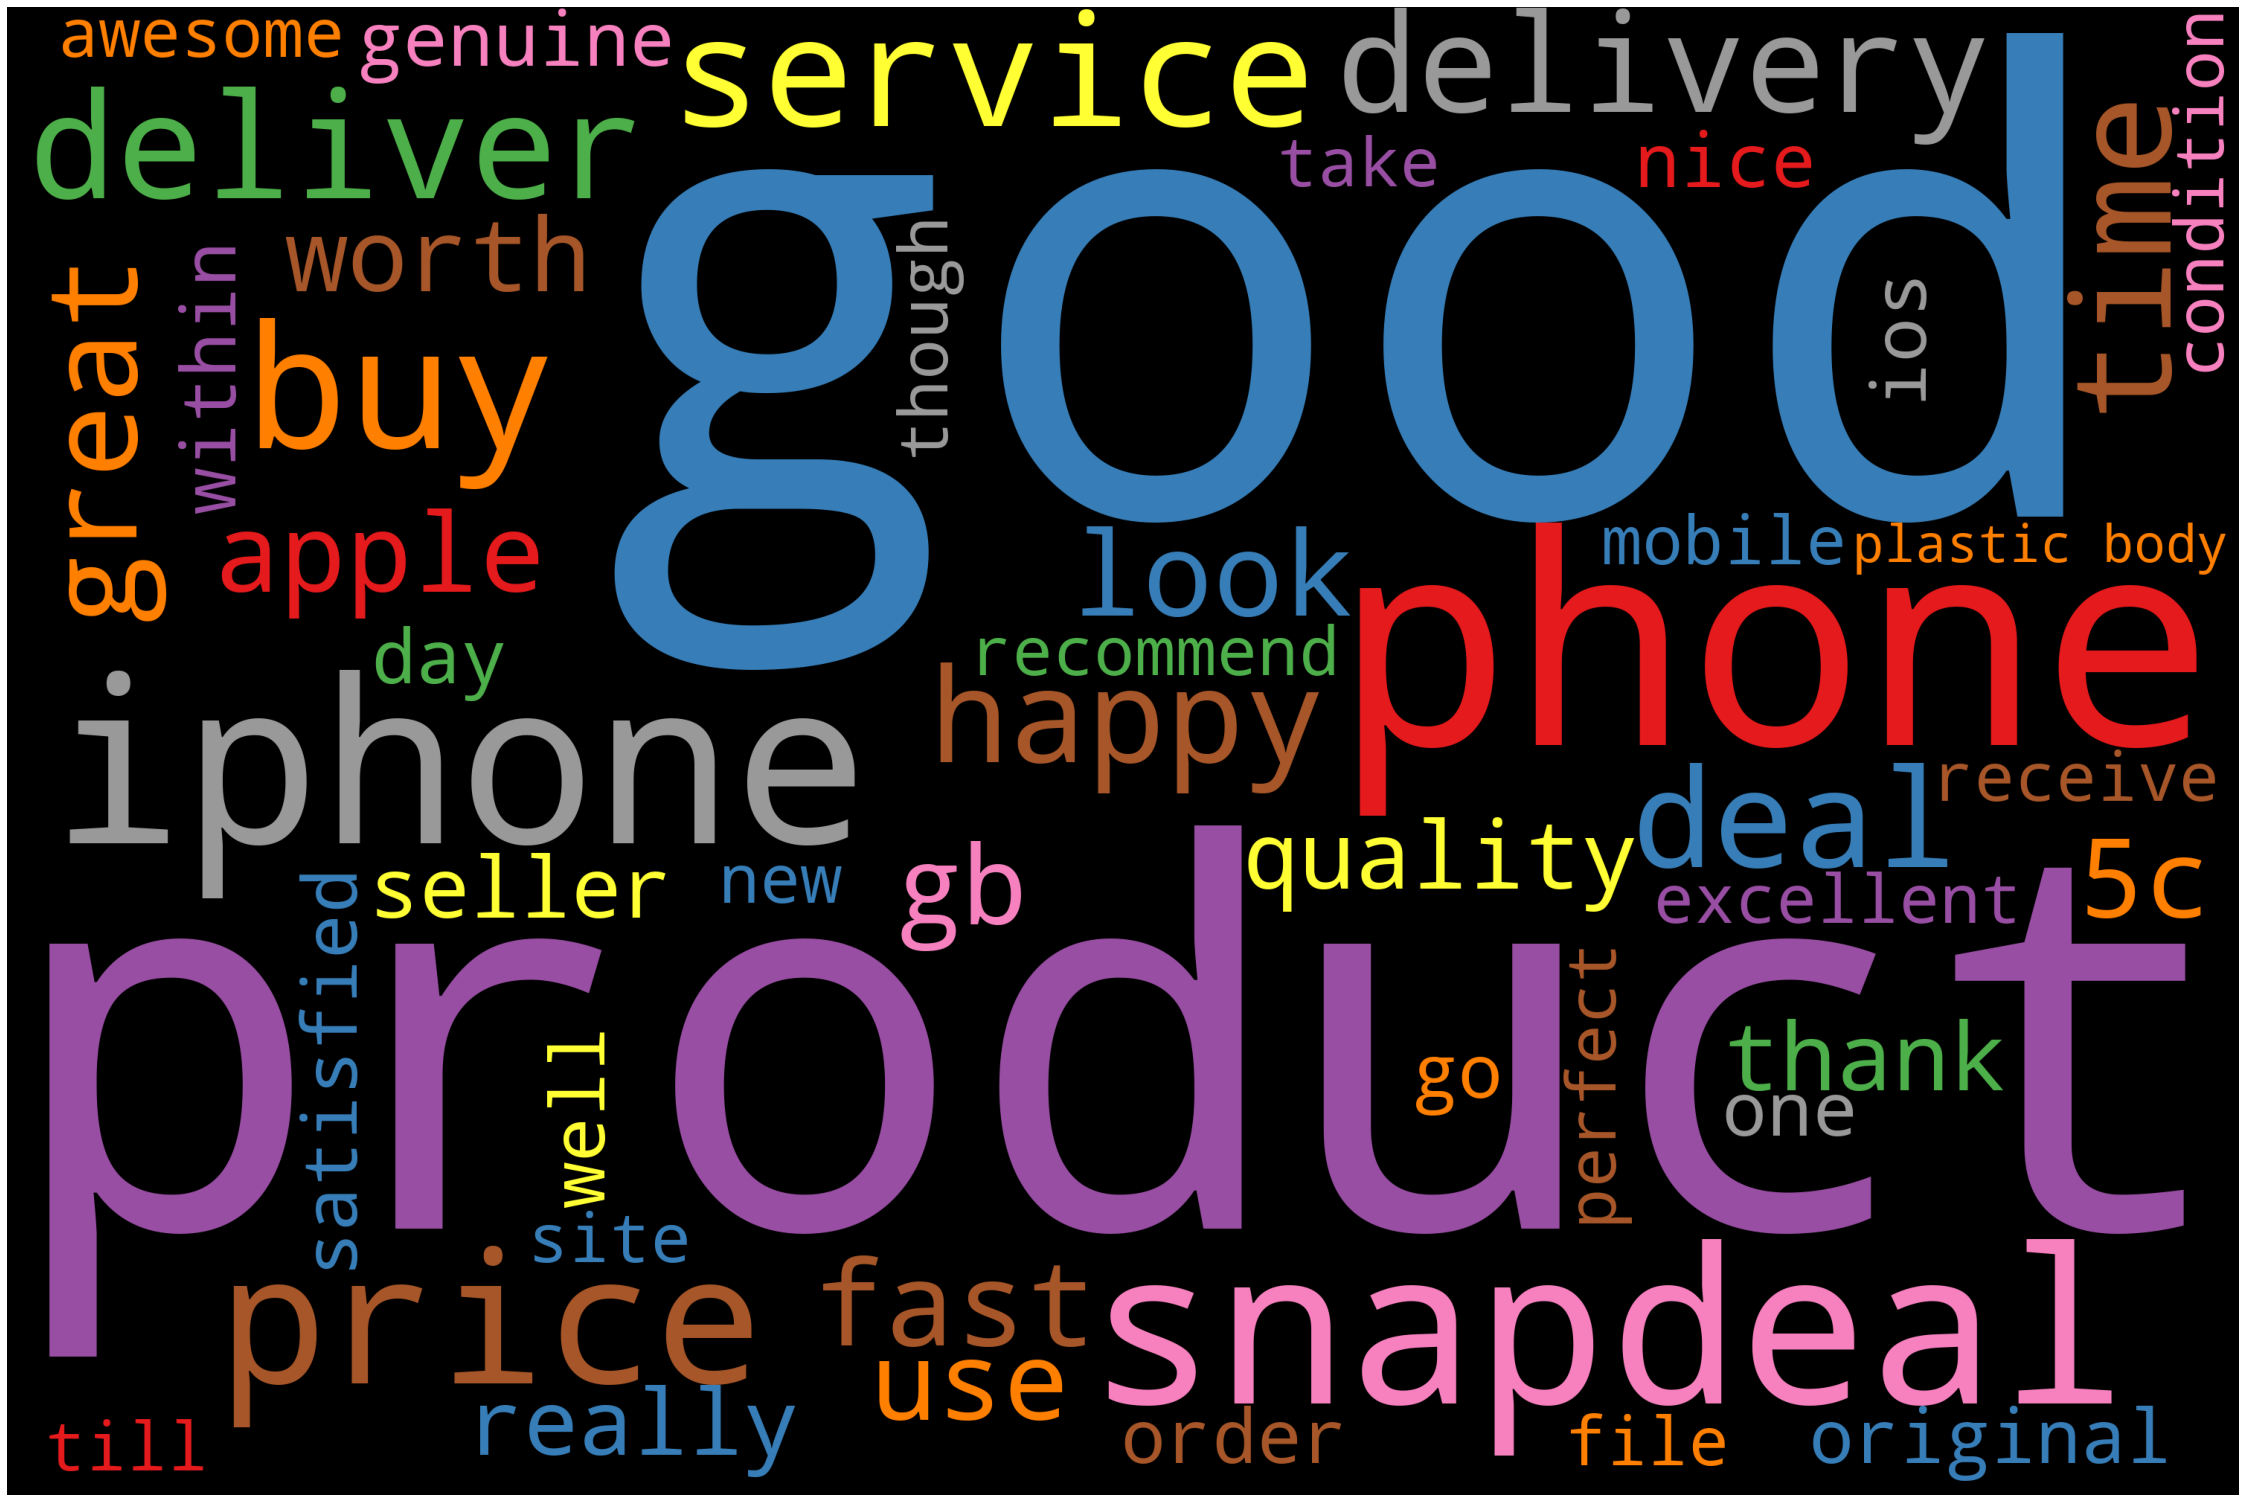

In [31]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_comments)
plot_cloud(wordcloud)

In [ ]:
#Emotion Mining - Sentiment Analysis

In [33]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(iphone_snapdeal))
sentences

['very good product...thanks to snapdeal and sellers to delivered the original phone :0) Good product.',
 'Worth buying.',
 'Nice phone.',
 'Timely delivery by snap deal Pros : Picture quality is awesome, sound with hearing ad is good, look and feel is good \n \ncons: You cannot transfer files using bluetooth from andriod/blackberry/windows to iphone, You have to use some file transfer app like shareit.',
 'Other is good.',
 'I am new to iphone so till now this is it.',
 'iPhone 5c + Snapdeal before time delivery = 4 stars lovely  fastest super Have switched from android to apple and i am pretty satisfied with iPhone 5c .',
 'Excellent camera , crisp display .',
 'The battery  issue has been solved with the latest ios9 update .',
 'Genuine product quality great..',
 'Overall perfect I bought iPhone 5C with best deal ever.',
 'Product is quite good and I also updated it to latest iOS version.',
 'Very happy with the deal.. it is simple \nall the thing that u need it having it \nI have b

In [34]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,very good product...thanks to snapdeal and sel...
1,Worth buying.
2,Nice phone.
3,Timely delivery by snap deal Pros : Picture qu...
4,Other is good.
...,...
121,Snapdeal has provided me a very great deal as ...
122,"Also, the delivery was very prompt as well."
123,"Pros: Sleek phone, looks sexy, no lags, really..."
124,Original products...\n\nGood job snapdeal...ke...


In [35]:
# Emotion Lexicon - Affin
affin=pd.read_csv('E:/Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [36]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [37]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [38]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0       8
1       2
2       3
3      12
4       3
       ..
121     3
122     0
123     8
124     3
125    11
Name: sentiment_value, Length: 126, dtype: int64

In [39]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      15
1       2
2       2
3      43
4       3
       ..
121    13
122     8
123    41
124     7
125    26
Name: word_count, Length: 126, dtype: int64

In [40]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
55,But those all reviews are fake and just to dam...,-6,14
67,Dont buy on fraudulent schemes.,-4,5
106,Dere is only one problem nd dat is space... Bt...,-4,20
29,Only problem is you need to pay for everything.,-3,9
13,no lagging till today\nsuitable for your busin...,-3,9
...,...,...,...
3,Timely delivery by snap deal Pros : Picture qu...,12,43
53,"i would recommend this phone Good , product is...",13,26
49,I got my iPhone 5c white colour in good condit...,13,72
19,Awesome mobile working smooth just like an app...,13,24


In [41]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    126.000000
mean       2.968254
std        3.896535
min       -6.000000
25%        0.000000
50%        2.000000
75%        5.000000
max       15.000000
Name: sentiment_value, dtype: float64

In [42]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
5,I am new to iphone so till now this is it.,0,11
13,no lagging till today\nsuitable for your busin...,-3,9
15,Faster delivery and proper packing.,0,5
21,Original Apple Product and delivery in 2nd day.,0,8
25,"Overall performance is Good Good Product, Do n...",0,9
26,Samsung products are pathetic.,-2,4
27,Used Grand Qauttro which use to take 20-30 sec...,0,14
28,Apple is quality product.,0,4
29,Only problem is you need to pay for everything.,-3,9
34,Delivery was fast.,0,3


In [43]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,very good product...thanks to snapdeal and sel...,8,15
1,Worth buying.,2,2
2,Nice phone.,3,2
3,Timely delivery by snap deal Pros : Picture qu...,12,43
4,Other is good.,3,3
...,...,...,...
117,"After using android for 3 years, I was not sat...",2,13
121,Snapdeal has provided me a very great deal as ...,3,13
123,"Pros: Sleek phone, looks sexy, no lags, really...",8,41
124,Original products...\n\nGood job snapdeal...ke...,3,7


In [44]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,very good product...thanks to snapdeal and sel...,8,15,0
1,Worth buying.,2,2,1
2,Nice phone.,3,2,2
3,Timely delivery by snap deal Pros : Picture qu...,12,43,3
4,Other is good.,3,3,4
...,...,...,...,...
121,Snapdeal has provided me a very great deal as ...,3,13,121
122,"Also, the delivery was very prompt as well.",0,8,122
123,"Pros: Sleek phone, looks sexy, no lags, really...",8,41,123
124,Original products...\n\nGood job snapdeal...ke...,3,7,124


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

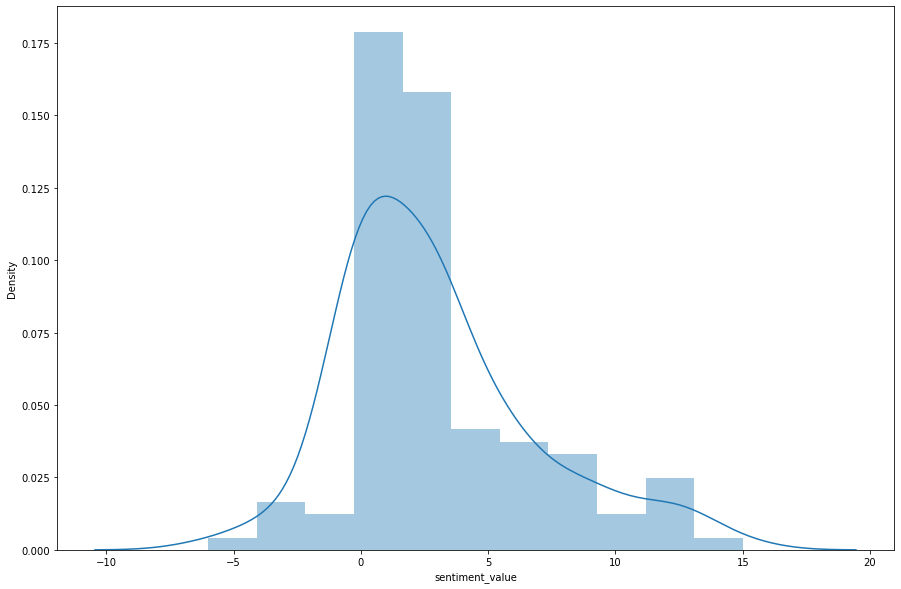

In [45]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

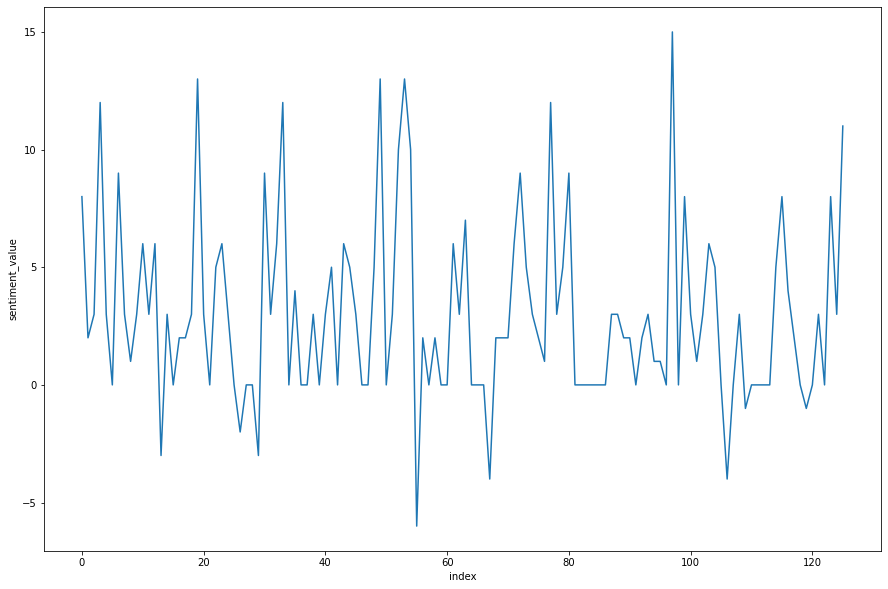

In [46]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

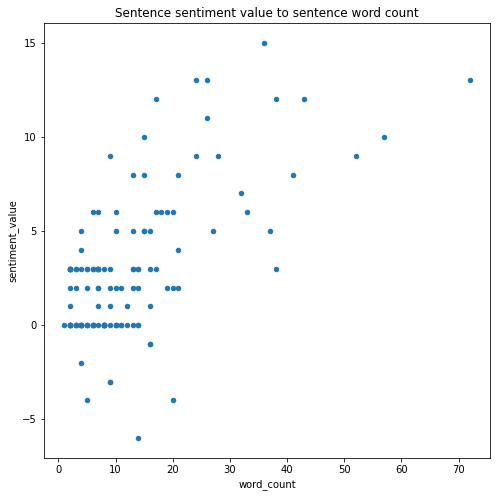

In [47]:
# Correlation analysis
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')

In [ ]:
# in this contains some negative reviews which are less when compared to positive reviews